# Dalle Runtime Example

Ensure you have everything set up as per README.md.

## Setup

Ensure you've created the conda environment as outlined in the README

## Run Server

> mlserver start docs/examples/multimodel/.

## Send Request

In [21]:
import requests

data = {
    "inputs": [{
        "name": "text_inputs",
        "shape": [1],
        "datatype": "BYTES",
        "data": ["Cookies"]
    }],
    "parameters": { "seed": 3 }
}
result = requests.post("http://localhost:8080/v2/models/gpt2/infer", json=data)

In [22]:
import json

result_json = json.loads(result.json()["outputs"][0]["data"][0])
result_str = result_json[0][0]["generated_text"]

result_str = result_str.replace("\n", " ")

print(result_str)

Cookies, we do not serve, because our store in the parking lot in the basement is NOT going to be there. We use it because of food and some other services that you can find in the store (which make our product available even if


In [23]:
import requests

data = {
    "inputs": [{
        "name": "text_inputs",
        "shape": [1],
        "datatype": "BYTES",
        "data": [result_str]
    }],
    "parameters": { "seed": 3 }
}
result = requests.post("http://localhost:8080/v2/models/dalle-model/infer", json=data)

## Process Response

In [24]:
from mlserver.types import InferenceResponse

ir = InferenceResponse(**result.json())

## Decode Output

In [25]:
from mlserver.codecs import NumpyCodec

np_arr = NumpyCodec.decode_output(ir.outputs[0])

## Display Output

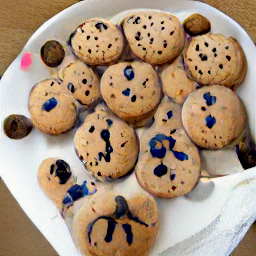

In [26]:
from PIL import Image

img_arr = Image.fromarray(np_arr, 'RGB')

display(img_arr)